# Cluster Modeling - K Means

In [1]:
# load rfm dataframe
import pickle

# data wrangling
import numpy as np
import pandas as pd
import datetime as dt

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

#for clustering model
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import kelbow_visualizer

from sklearn.decomposition import PCA

In [2]:
df_cluster = pd.read_pickle('./data/rfm_scaled.pkl')

## K-Means Model

### Elbow visualizer method

Finding the best value for k (number of clusters).

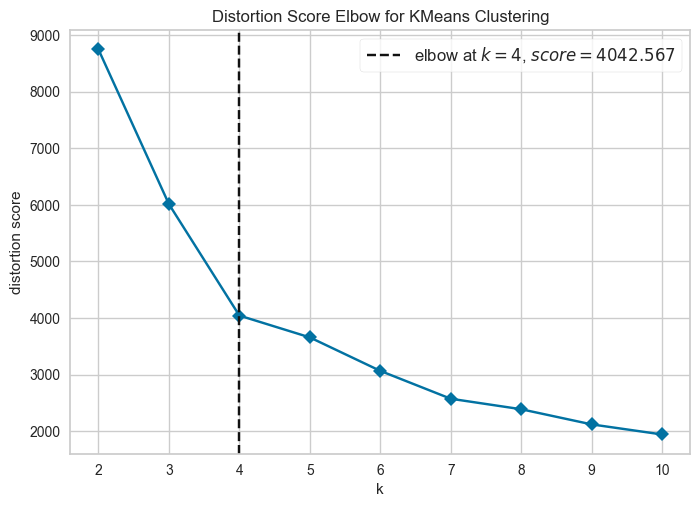

KElbowVisualizer(ax=<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(n_clusters=10, n_init='auto'), timings=False)

In [3]:
# Find best K
kelbow_visualizer(model=KMeans(n_init='auto'), X=df_cluster.drop(columns = 'CustomerID'), timings=False)

This shows that the optimal value for Elbow Distortion score was k = 4 clusters.

### Silhouette score analysis

$\text{silhouette score}=\frac{p-q}{max(p,q)}$

$p$: mean distance to the points in the nearest cluster

$q$: mean intra-cluster distance to all points

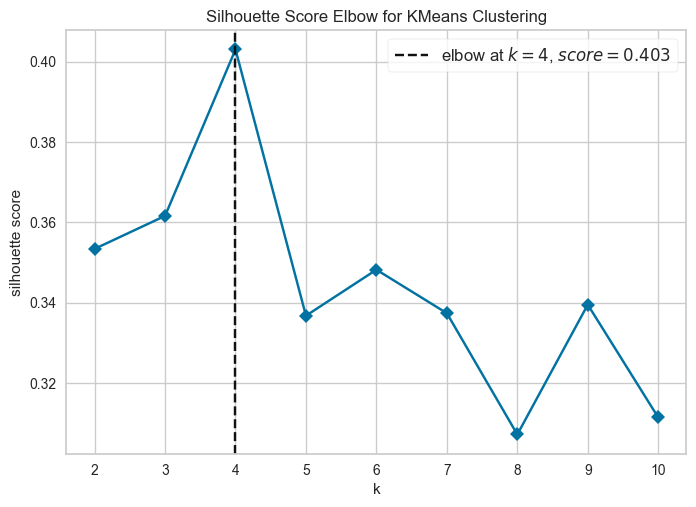

In [8]:
kelbow_visualizer(model=KMeans(n_init='auto'), 
                  X=df_cluster.drop(columns = 'CustomerID'),
                  timings=False, 
                  metric='silhouette'
                  );

In [9]:
# Silhouette score analysis
k_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]



for k in k_clusters:
    kmeans = KMeans(n_clusters=k, max_iter=50, n_init=10)
    kmeans.fit(df_cluster.drop(columns = 'CustomerID'))
    cluster_labels = kmeans.labels_
    silhouette = silhouette_score(df_cluster.drop(columns = 'CustomerID'), cluster_labels)
    print("k={0}: silhouette score = {1}".format(k, silhouette))

k=2: silhouette score = 0.3532440361882673
k=3: silhouette score = 0.3845737899419098
k=4: silhouette score = 0.403381121707136
k=5: silhouette score = 0.3381361737358867
k=6: silhouette score = 0.34830867336123406
k=7: silhouette score = 0.33821862020255355
k=8: silhouette score = 0.3390351312302869
k=9: silhouette score = 0.33947972309385105
k=10: silhouette score = 0.3306335896718995


The higher silhouetter score (closest to 1) is 0.403, again, for k = 4. Closer to 1 scores indicates that points in the cluster are more similar to the other points in the same cluster and more distant to points on another cluster.

So, k will be 4 for the K-Means model.

### K-Means model with k = 4

In [4]:
rfm = pd.read_pickle('./data/rfm.pkl')

In [5]:
rfm = rfm.reset_index()

In [6]:
kmeans_model = KMeans(n_clusters=4, max_iter=20, n_init=10, random_state=42)
kmeans_model.labels_= kmeans_model.fit_predict(df_cluster.drop(columns = 'CustomerID'))

In [7]:
df_kmeans=df_cluster
df_kmeans['cluster_number'] = kmeans_model.labels_.astype('str')

In [8]:
df_kmeans.head(15)

,CustomerID,0,1,2,cluster_number
0,12347,-0.914920,0.857420,1.757164,2
1,12348,-0.188168,0.084642,0.813643,2
2,12350,2.151378,-0.688136,0.162081,0
3,12352,-0.576433,1.115013,0.042156,3
4,12353,1.096094,-0.688136,-1.229385,0
5,12355,1.195649,-0.688136,0.870856,0
6,12358,-0.914920,-0.430543,1.577532,2
7,12360,-0.417145,-0.172951,3.297416,2
8,12361,1.922401,-0.688136,-0.657262,0
9,12362,-0.904965,1.630198,1.229325,3


In [38]:
rfm_kmeans = pd.merge(rfm, df_cluster, on = 'CustomerID').drop(columns = [0, 1, 2])

In [27]:
rfm_kmeans.head(10)

,CustomerID,R (days),F,M (R$),cluster_number
0,12347,1,7,615.71,2
1,12348,74,4,449.31,2
2,12350,309,1,334.40,0
3,12352,35,8,313.25,3
4,12353,203,1,89.00,0
5,12355,213,1,459.40,0
6,12358,1,2,584.03,2
7,12360,51,3,887.35,2
8,12361,286,1,189.90,0
9,12362,2,10,522.62,3


### Visualizing 3D points clusters

In [11]:
from mpl_toolkits.mplot3d import Axes3D

plot_kmeans = rfm_kmeans.drop(columns = 'CustomerID')

plot_kmeans['R (days)'] = plot_kmeans['R (days)'].astype(int)
plot_kmeans['F'] = plot_kmeans['F'].astype(int)
plot_kmeans['M (R$)'] = plot_kmeans['M (R$)'].astype(float).astype(int)

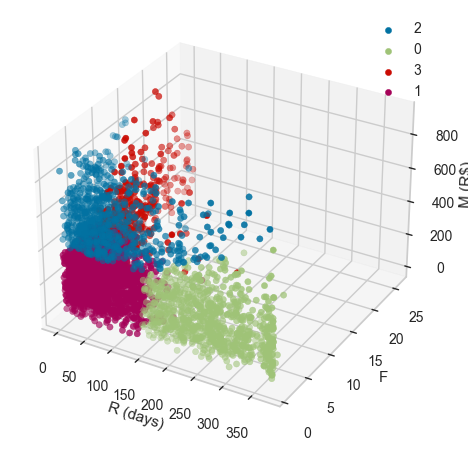

In [12]:
fig = plt.figure() 
ax = Axes3D(fig)
ax = fig.add_subplot(projection='3d')

for l in plot_kmeans.cluster_number.unique():
    ax.scatter(plot_kmeans['R (days)'][plot_kmeans.cluster_number==l],
               plot_kmeans['F'][plot_kmeans.cluster_number==l],
               plot_kmeans['M (R$)'][plot_kmeans.cluster_number==l],label=l)
    
ax.legend()
ax.set_xlabel('R (days)') 
ax.set_ylabel('F') 
ax.set_zlabel('M (R$)')
plt.show()

Interactive plot

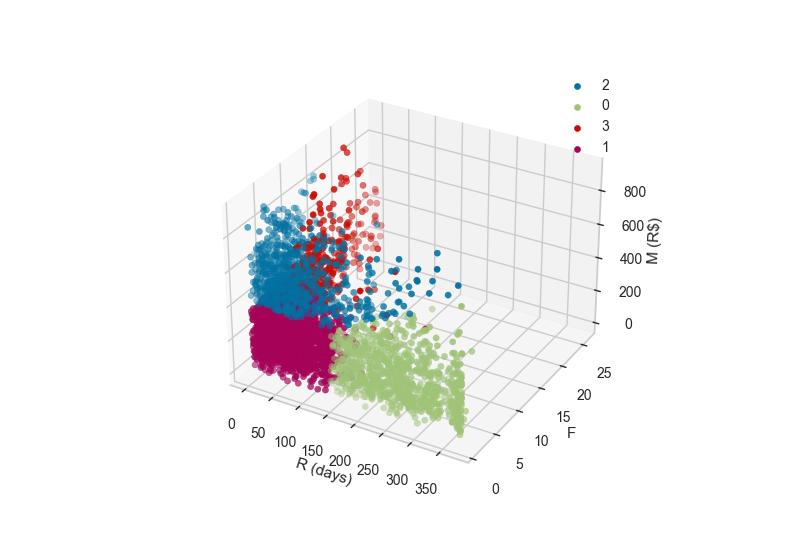

In [13]:
# responsive plot 
%matplotlib widget 

fig = plt.figure() 
ax = Axes3D(fig)
ax = fig.add_subplot(projection='3d')

for l in plot_kmeans.cluster_number.unique():
    ax.scatter(plot_kmeans['R (days)'][plot_kmeans.cluster_number==l],
               plot_kmeans['F'][plot_kmeans.cluster_number==l],
               plot_kmeans['M (R$)'][plot_kmeans.cluster_number==l],label=l)
    
ax.legend()
ax.set_xlabel('R (days)') 
ax.set_ylabel('F') 
ax.set_zlabel('M (R$)')
plt.show()

### Using Principal Component Analysis (PCA) for dimensionality reduction

In [14]:
pca=PCA(n_components=2)
pc=pca.fit_transform(df_cluster.drop(columns = ['CustomerID', 'cluster_number']))

<Axes: xlabel='PC1', ylabel='PC2'>

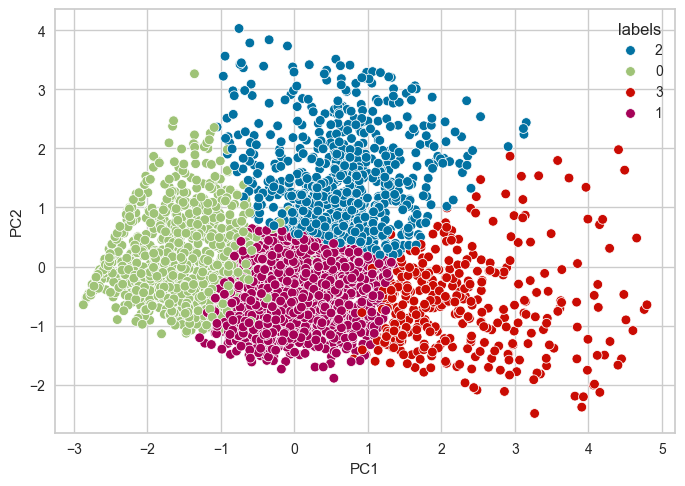

In [18]:
fig = plt.figure()
pc_df=pd.DataFrame(data=pc, columns=['PC1','PC2'])
pc_df['labels']=df_kmeans['cluster_number']
sns.scatterplot(data=pc_df,x='PC1',y='PC2',hue='labels')

In [19]:
df_cluster[['CustomerID', 'cluster_number']].groupby('cluster_number').count()

,CustomerID
cluster_number,
0,920
1,1973
2,786
3,396


<Axes: xlabel='M (R$)', ylabel='R (days)'>

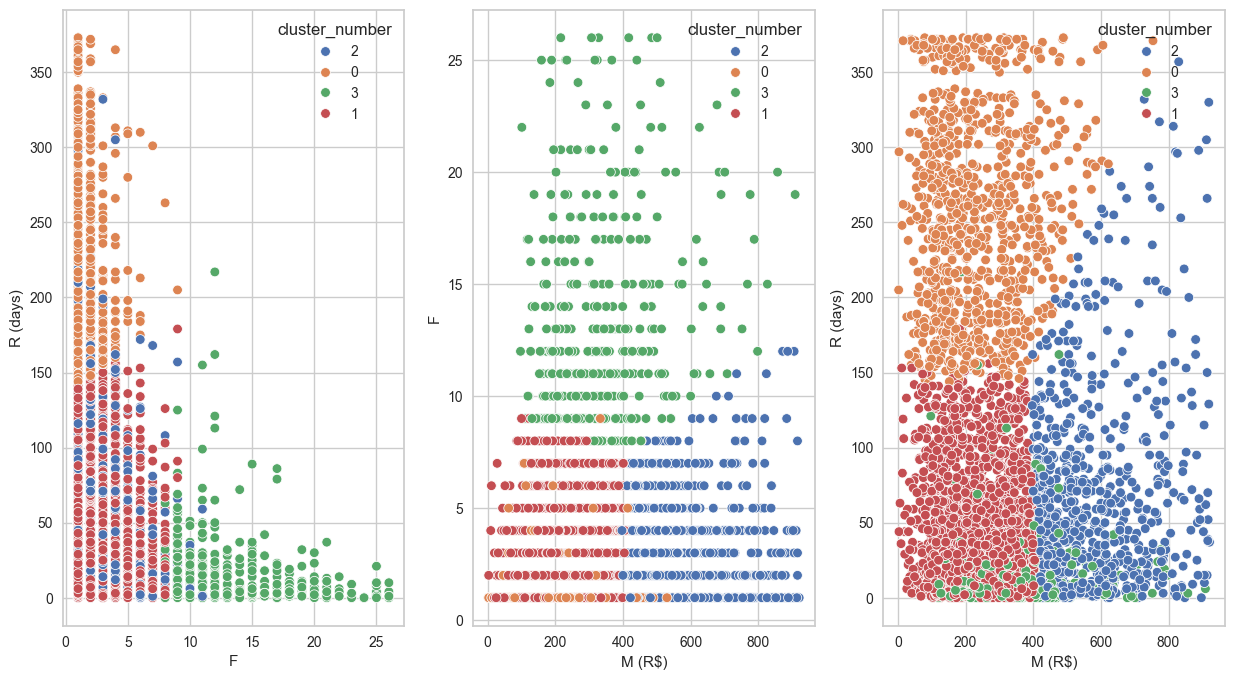

In [20]:
f, axes = plt.subplots(1, 3,figsize=(15, 8))
sns.scatterplot(data=plot_kmeans,x='F',y='R (days)',hue='cluster_number',ax=axes[0],palette="deep")
sns.scatterplot(data=plot_kmeans,x='M (R$)',y='F',hue='cluster_number',ax=axes[1],palette="deep")
sns.scatterplot(data=plot_kmeans,x='M (R$)',y='R (days)',hue='cluster_number',ax=axes[2],palette="deep")

In [21]:
plot_kmeans['cluster_number'] = plot_kmeans['cluster_number'].astype(int)
plot_kmeans.dtypes

R (days)          int32
F                 int32
M (R$)            int32
cluster_number    int32
dtype: object

In [22]:
plot_kmeans[['R (days)', 'F', 'M (R$)', 'cluster_number']].groupby('cluster_number').agg('mean').head()

,R (days),F,M (R$)
cluster_number,,,
0,252.564130,1.491304,227.525000
1,44.294475,2.975165,228.779524
2,66.428753,3.159033,570.924936
3,16.681818,13.222222,340.303030


We can see that **cluster 0** has the HIGHEST recency (a much higher average value of 250 days) and the LOWEST frequency, which means customers belonging to this cluster are much less frequent. Also, they are the ones that pay the least, with the lowest average ticket value. In other words, **these customers are potentially churning, they are more likely to quit and no longer be a customer.**

Customers in **cluster 1** also pay little, but with a slightly higher frequency and the second lowest recency, that is, **they are purchasing customers, but infrequent and that pay little.**

Customers in **cluster 2** keep longer time without purchasing, however, during some seasons, they buy more frequently than customers in cluster 1. Furthermore, they have the HIGHEST average ticker value. In other words, **they are more seasonal customers, who make large purchases with high prices at certain times of the year.**

Finally, customers in **cluster 3** have the HIGHEST frequency (much higher average value than the other clusters), the lowest recency of all, just 16 days, and an reasonably good monetary value, not so high and not so low. In other words, these customers **are regular customers, more frequent and loyal.**

#### Potential strategies:

For customers in cluster 0, a more effective strategy is recommended to attract them to the company, since they have a high risk of evasion. For cluster 2, a good path would be to prioritize marketing offers and investments for each time of the year and invest in customer relationship excellence. As for customers in cluster 3, it would be important to maintain constant contact with them, and seek to transform them into brand promoters, using social media, etc. For cluster 1, one way to try to build customer loyalty would be to show them more options by presenting a broader, customer-specific list (through personalized recommendation) of products in the catalog.

*(portuguese)*

Podemos ver que o **cluster 0** tem a MAIOR recência (um valor médio muito maior, de 250 dias) e a MENOR frequência, ou seja, os clientes pertencentes a esse cluster são muito menos assíduos. Além disso, são os que pagam menos em média, com o menor valor de ticket médio. Ou seja, **esses clientes são potencialmente churn, têm maior probabilidade de deixarem de ser clientes.**

Já os clientes do **cluster 1** também pagam pouco, mas com frequência um pouco maior e a segunda menor recência, ou seja, **são clientes compradores, mas pouco frequentes e que pagam pouco.**

Os clientes do **cluster 2** ficam mais tempo sem comprar, porém, em determinadas épocas, compram com mais frequência que os clientes do cluster 1. Além disso, detêm o MAIOR valor de ticker médio. Ou seja, **são clientes mais sazonais, que fazem grandes compras com valores elevados em determinadas épocas do ano.**

Por fim, os clientes do **cluster 3** detêm a MAIOR frequência (valor médio muito maior que os demais clusters), a menor recência de todas, de apenas 16 dias, e um bom valor monetário, nem tão baixo e nem tão alto quanto o cluster 2. Ou seja, esses clientes **são os clientes regulares, ou seja, mais assíduos e fiéis, que compram de forma mais constante e pagando um bom valor.**

#### Potenciais estratégias:

Para os clientes do cluster 0, recomenda-se uma estratégia mais eficaz que vise atraí-los para a empresa, uma vez que possuem alto risco de evasão. Para o cluster 2, um bom caminho seria dar prioridade a ofertas e investimentos de marketing para cada época do ano e investir na excelência do relacionamento com o cliente. Quanto aos clientes do cluster 3, seria importante manter com eles contato constante, e buscar transformá-los em promotores da marca, usando mídias sociais, etc. Para o cluster 1, uma maneira de tentar fidelizá-los seria mostrar a eles mais opções, apresentando uma lista mais ampla e específica para o cliente (por meio de recomendação personalizada) de produtos no catálogo.

In [41]:
rfm_kmeans['cluster_number'] = rfm_kmeans['cluster_number'].astype(int)

In [42]:
rfm_kmeans = rfm_kmeans[['CustomerID', 'cluster_number']]

In [43]:
rfm_kmeans.replace({0: 'Possible churn', 1: 'Non frequent client', 2: 'Seasonal', 3: 'Regular customer'})

,CustomerID,cluster_number
0,12347,Seasonal
1,12348,Seasonal
2,12350,Possible churn
3,12352,Regular customer
4,12353,Possible churn
...,...,...
4070,18280,Possible churn
4071,18281,Possible churn
4072,18282,Non frequent client
4073,18283,Regular customer
